In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [2]:

# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

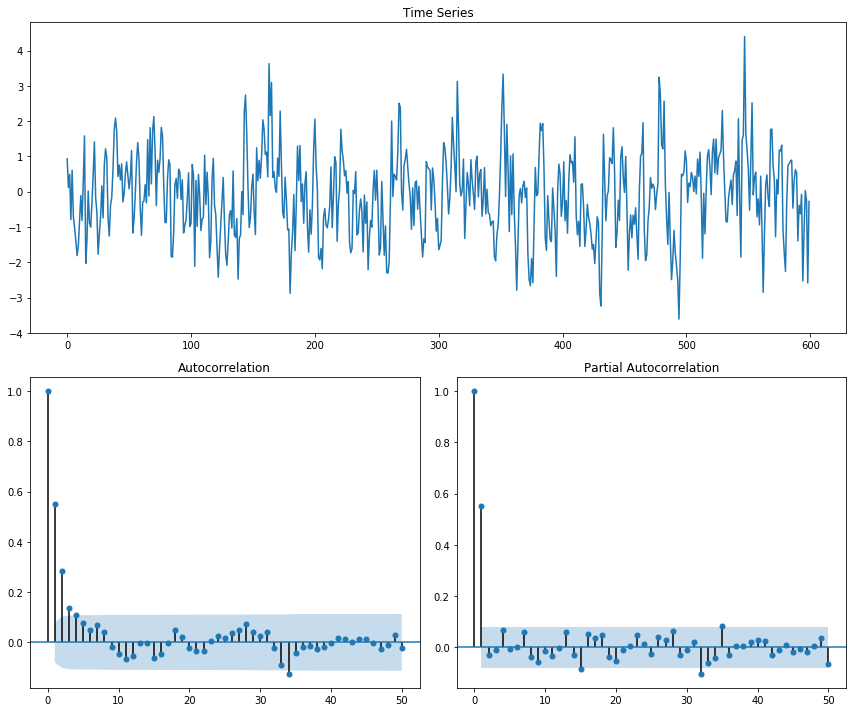

In [3]:
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)
plt.savefig('../plots/ch4/P_01.png', format='png', dpi=300)

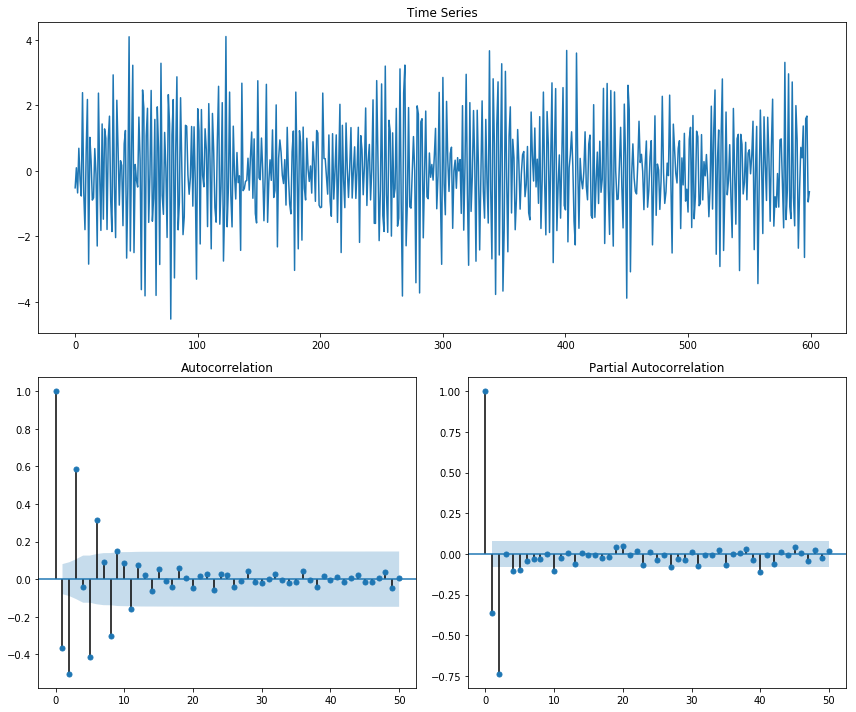

In [12]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)


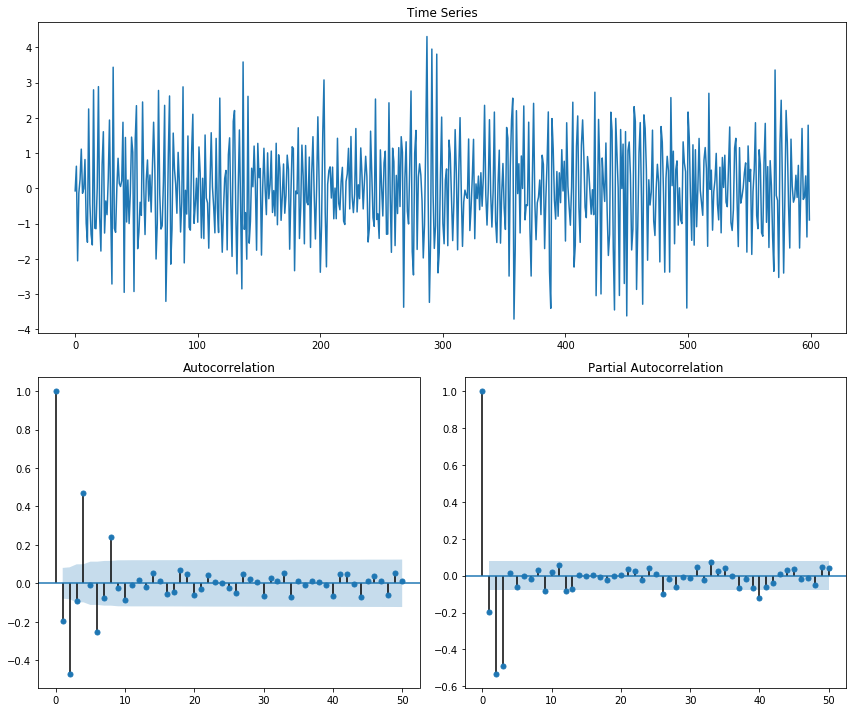

In [13]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [14]:
# Build AR(1) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -859.185
Method:                           mle   S.D. of innovations              1.012
Date:                Fri, 07 Feb 2020   AIC                           1722.370
Time:                        10:15:02   BIC                           1731.164
Sample:                             0   HQIC                          1725.793
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9206      0.016     58.747      0.000       0.890       0.951
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0863           +0.0000j            1.0863            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
# Build MA(3) model
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -851.727
Method:                           mle   S.D. of innovations              0.999
Date:                Fri, 07 Feb 2020   AIC                           1711.453
Time:                        10:15:03   BIC                           1729.041
Sample:                             0   HQIC                          1718.300
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5564      0.036    -15.556      0.000      -0.626      -0.486
ar.L2.y       -0.6723      0.032    -20.983      0.000      -0.735      -0.610
ar.L3.y       -0.4837      0.036    -13.521      0.000      -0.554      -0.414
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0674           -1.1624j            1.1644           -0.2408
AR.2            0.0674           +1.1624j            1.1644            0.2408
AR.3           -1.5248           -0.0000j            1.5248           -0.5000
-----------------------------------------------------------------------------
"""

\begin{equation}
X_t = \phi \epsilon_{t-1} + \epsilon_t
\end{equation}

\begin{equation}
X_t = \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2}  + \epsilon_t
\end{equation}

\begin{equation}
X_t = \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2}+...  + \phi_p \epsilon_{t-p}+ \epsilon_t
\end{equation}